# 정형 데이터마이닝

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

In [2]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

1.&nbsp; 연관규칙분석을 수행하기 위해 lotto 데이터셋을 transaction 데이터로 변환하시오(로또가 추첨된 순서는 고려하지 않는다.). 변환된 데이터에서 가장 많이 등장한 상위 10개의 로또번호를 막대그래프로 출력하고 이에 대해 설명하시오.

In [3]:
data_path = '/hdd/data/adp_data/lotto.csv'
df = pd.read_csv(data_path, index_col = 'time_id')
df.sort_index(inplace = True)
df

,num1,num2,num3,num4,num5,num6
time_id,,,,,,
1,10,23,29,33,37,40
2,9,13,21,25,32,42
3,11,16,19,21,27,31
4,14,27,30,31,40,42
5,16,24,29,40,41,42
...,...,...,...,...,...,...
855,8,15,17,19,43,44
856,10,24,40,41,43,44
857,6,10,16,28,34,38


In [4]:
transactions = df.values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns = te.columns_)
df_encoded

,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
0,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
854,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,True,False
855,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,True,False,True,True,False
856,False,False,False,False,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
857,False,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,False,False,True,False,False


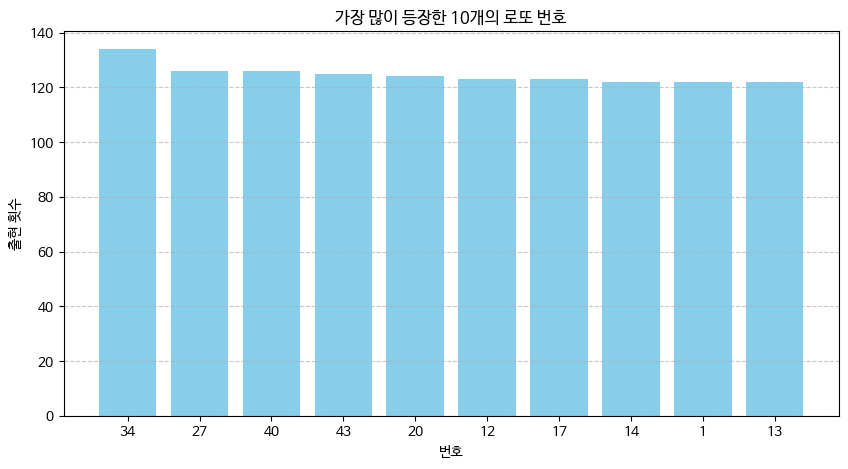

In [5]:
all_numbers = df.values.flatten()
number_counts = pd.Series(all_numbers).value_counts()
top_10 = number_counts.head(10)

plt.figure(figsize = (10, 5))
plt.bar(top_10.index.astype(str), top_10.values, color = 'skyblue')
plt.xlabel('번호')
plt.ylabel('출현 횟수')
plt.title('가장 많이 등장한 10개의 로또 번호')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

2.&nbsp; 변환한 데이터에 다음 괄호 안의 조건을 반영하여 연관규칙을 생성하고, 이를 'rules_1'이라는 변수에 저장하여 결과를 해석하시오. (최소 지지도: 0.002, 최소 신뢰도: 0.8, 최소조합 항목 수: 2개, 최대조합 항목 수: 6개) 도출된 연관규칙들을 향상도를 기준으로 내림차순 정렬하여 상위 30개의 규칙을 확인하고, 이를 데이터프레임으로 변환하여 csv파일로 출력하시오.

In [ ]:
frequent_itemsets = apriori(
    df_encoded, min_support = 0.002, use_colnames = True, max_len = 6
)

rules1 = association_rules(frequent_itemsets, metric = 'confidence', min_threshold = 0.8)
rules1_sorted = rules1.sort_values(by = 'lift', ascending = False)
top_30_rules = rules1_sorted.head(30)
top_30_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
643,"(24, 34, 22)","(31, 7)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
642,"(34, 31, 7)","(24, 22)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
703,"(16, 26, 31)","(43, 36)",0.002328,0.012806,0.002328,1.0,78.090909,1.0,0.002298,inf,0.989498,0.181818,1.0,0.590909
702,"(16, 26, 43)","(36, 31)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
652,"(34, 10, 36)","(44, 22)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
646,"(24, 22, 31)","(34, 7)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
666,"(24, 20, 15)","(12, 30)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
682,"(26, 21, 14)","(18, 15)",0.002328,0.013970,0.002328,1.0,71.583333,1.0,0.002296,inf,0.988331,0.166667,1.0,0.583333
700,"(16, 43, 36)","(26, 31)",0.002328,0.015134,0.002328,1.0,66.076923,1.0,0.002293,inf,0.987165,0.153846,1.0,0.576923
658,"(26, 11, 36)","(17, 21)",0.002328,0.016298,0.002328,1.0,61.357143,1.0,0.002290,inf,0.985998,0.142857,1.0,0.571429


In [ ]:
# top_30_rules.to_csv('top_30_association_rules.csv', index = False)

3.&nbsp; 생성된 연관규칙 'rules_1'에 대한 정보를 해석하고, 1번 문제를 통해 확인햇을 때 가장 많이 추첨된 번호가 우측항에 존재하는 규칙들만을 'rules_most_freq'라는 변수에 저장하시오. 그리고 해당 규칙들을 해석하여 인사이트를 도출한 후 서술하시오.

In [13]:
print(f'총 생산된 연관 규책 개수: {len(rules1)}\n')

summary_stats = rules1[['support', 'confidence', 'lift']].describe()
print(f'연관 규칙 요약 통계:\n', summary_stats, '\n')

rules1['antecedent_len'] = rules1['antecedents'].apply(lambda x: len(x))
rules1['consequent_len'] = rules1['consequents'].apply(lambda x: len(x))
print(f'선행 조건 개수 분포:\n', rules1['antecedent_len'].value_counts(), '\n')
print(f'결과 조건 개수 분포:\n', rules1['consequent_len'].value_counts(), '\n')

print(f'향상도가 높은 상위 5개 규칙:')
print(rules1.sort_values(by = 'lift', ascending = False).head())

총 생산된 연관 규책 개수: 704

연관 규칙 요약 통계:
           support  confidence        lift
count  704.000000       704.0  704.000000
mean     0.002363         1.0    9.297555
std      0.000198         0.0    9.994010
min      0.002328         1.0    6.410448
25%      0.002328         1.0    7.040984
50%      0.002328         1.0    7.341880
75%      0.002328         1.0    7.738739
max      0.003492         1.0   78.090909 

선행 조건 개수 분포:
 antecedent_len
3    657
4     47
Name: count, dtype: int64 

결과 조건 개수 분포:
 consequent_len
1    679
2     25
Name: count, dtype: int64 

향상도가 높은 상위 5개 규칙:
      antecedents consequents  antecedent support  consequent support  \
643  (24, 34, 22)     (31, 7)            0.002328            0.012806   
642   (34, 31, 7)    (24, 22)            0.002328            0.012806   
703  (16, 26, 31)    (43, 36)            0.002328            0.012806   
702  (16, 26, 43)    (36, 31)            0.002328            0.013970   
652  (34, 10, 36)    (44, 22)            0.002328   

704개의 연관규칙이 도출되었음. 향상도가 78이 넘는 값이 있음. 해당 값을 확인해볼 필요가 있음.

In [17]:
rules_most_freq = rules1[rules1['consequents'].apply(lambda x: 34 in x)]
print(rules_most_freq.shape)
rules_most_freq

(23, 16)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedent_len,consequent_len
8,"(1, 5, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
50,"(2, 4, 31)",(34),0.003492,0.155995,0.003492,1.0,6.410448,1.0,0.002948,inf,0.846963,0.022388,1.0,0.511194,3,1
68,"(2, 21, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
72,"(2, 28, 15)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
192,"(5, 29, 13)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
203,"(17, 5, 29)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
281,"(7, 22, 31)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
282,"(24, 31, 7)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
419,"(12, 37, 36)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1
471,"(25, 44, 14)",(34),0.002328,0.155995,0.002328,1.0,6.410448,1.0,0.001965,inf,0.845974,0.014925,1.0,0.507463,3,1


16개의 규칙이 도출됨. 규칙들은 로또번호가 추첨되는 순서를 고려하지 않고 단순히 조합에 대한 확률만을 고려한 규칙이므로, 향상도가  높은 숫자들의 조합이 로또 추첨번호가 될 가능성이 높은 것은 아니다.